In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Display plots inline and set default figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# Assuming the dataset is loaded into a Kaggle notebook with the filename 'nips_papers.csv'
nips_papers = pd.read_csv(r"C:\Datasets\NeurIPS\papers.csv")

In [2]:
nips_papers.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


For this project, we are most interested in the full_text column. It contains the text of the abstract and the paper. 

In [3]:
print(nips_papers.isnull().sum())

source_id       0
year            0
title           0
abstract     3319
full_text       3
dtype: int64


full_text is missing in only three rows. But there are more than three thousand rows where abstract text is missing.

In [4]:
# Dropping rows where 'abstract' is missing
nips_papers.dropna(subset=['full_text'], inplace=True)

# Reset index after dropping rows
nips_papers.reset_index(drop=True, inplace=True)

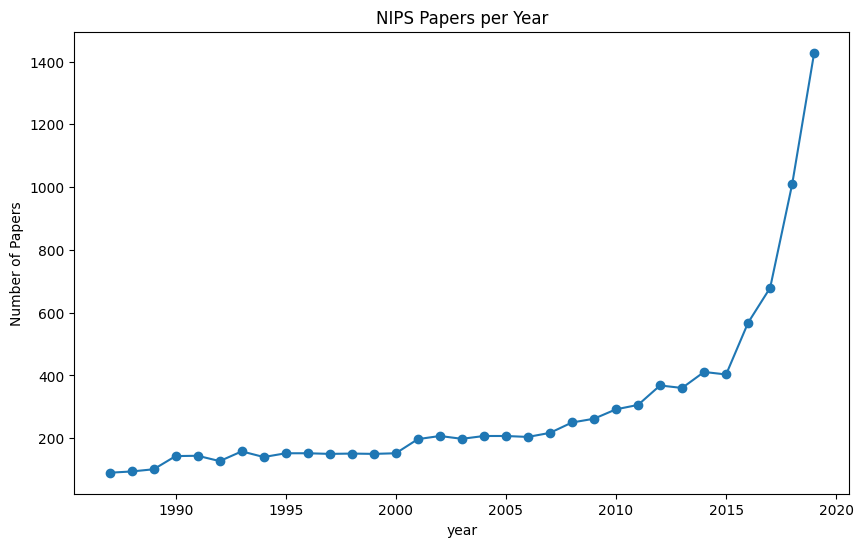

In [5]:
# Plotting the number of papers per year
papers_per_year = nips_papers.groupby('year')['title'].count()
papers_per_year.plot(kind='line', marker='o', title='NIPS Papers per Year')
plt.ylabel('Number of Papers')
plt.show()

C:\Users\Pan Lifan\AppData\Local\Temp\ipykernel_22624\2311367020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_words_freq, palette='Blues_d')


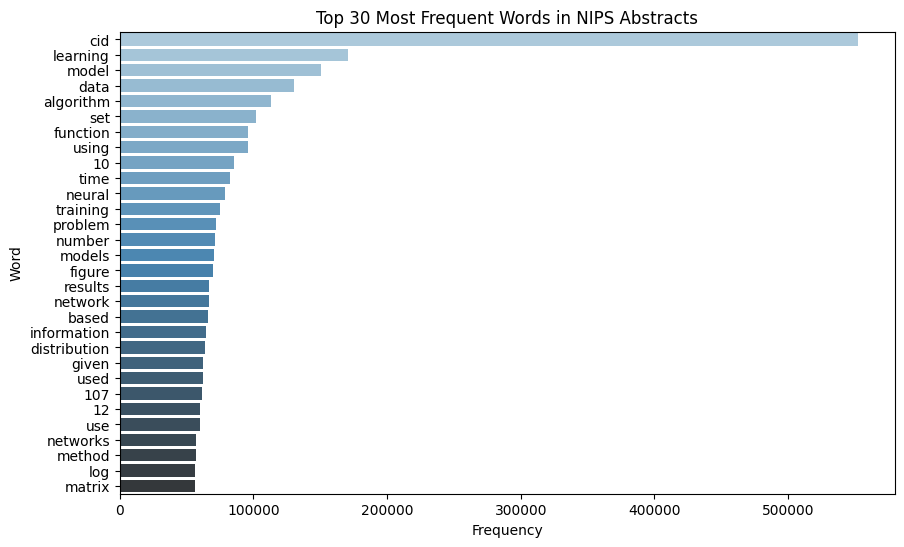

In [6]:
vec = CountVectorizer(stop_words='english', max_features=100)
word_counts = vec.fit_transform(nips_papers['full_text'])
sum_words = word_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Plotting the top 20 words
df_words_freq = pd.DataFrame(words_freq[:30], columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=df_words_freq, palette='Blues_d')
plt.title('Top 30 Most Frequent Words in NIPS Abstracts')
plt.show()

High-frequency words not filtered out by the standard stop words list but still irrelevant to content (like 'paper' or 'results') might need custom stop words processing or advanced techniques like TF-IDF to reduce their impact.

In [7]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to C:\Users\Pan
[nltk_data]     Lifan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pan
[nltk_data]     Lifan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Pan
[nltk_data]     Lifan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
print(nltk.data.find("tokenizers/punkt"))

C:\Users\Pan Lifan\AppData\Roaming\nltk_data\tokenizers\punkt


In [9]:
from nltk.tokenize import word_tokenize

# Using NLTK for tokenization
nips_papers['tokens'] = nips_papers['full_text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

In [10]:
from nltk.corpus import stopwords

# Load general English stopwords
stop_words = set(stopwords.words('english'))

In [11]:
# Define custom stopwords for NIPS context
custom_stopwords = {"cid", "neural", "network", "learning", "model", "algorithm", "data", 
                    "set", "function", "problem", "models", "number", "figure", "results",
                   "information", "distribution", "using", "used", "use", "given", "method",
                   "neural", "networks"}

# Function to remove both general and custom stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words and 
            token.lower() not in custom_stopwords and not token.isdigit()]

nips_papers['filtered_tokens'] = nips_papers['tokens'].apply(remove_stopwords)

In [12]:
import string
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to stem tokens
# def stem_tokens(tokens):
#     return [stemmer.stem(token) for token in tokens]

def stem_tokens(tokens):
    # Remove punctuation before stemming
    tokens = [token for token in tokens if token not in string.punctuation]
    return [stemmer.stem(token) for token in tokens]

nips_papers['stemmed_tokens'] = nips_papers['filtered_tokens'].apply(stem_tokens)

In [13]:
nips_papers['stemmed_tokens'][0] 

['bit',
 'serial',
 'alan',
 'f.',
 'murray',
 'anthoni',
 'v',
 'w.',
 'smith',
 'zoe',
 'f.',
 'butler',
 'depart',
 'electr',
 'engin',
 'univers',
 'edinburgh',
 'king',
 "'s",
 'build',
 'mayfield',
 'road',
 'edinburgh',
 'scotland',
 'eh93jl',
 'abstract',
 'bit',
 'serial',
 'vlsi',
 'describ',
 'initi',
 'architectur',
 'synaps',
 'array',
 'silicon',
 'layout',
 'board',
 'design',
 'issu',
 'surround',
 'bit',
 'serial',
 'comput',
 'analog/digit',
 'arithmet',
 'discuss',
 'parallel',
 'develop',
 'hybrid',
 'analog/digit',
 'outlin',
 'recal',
 'capabl',
 'report',
 'bit',
 'serial',
 'along',
 'project',
 'specif',
 'neuron',
 'bit',
 'serial',
 'board',
 'oper',
 'mhz',
 'tech',
 'cid:173',
 'niqu',
 'extend',
 'synaps',
 'updat',
 'time',
 '3m',
 '``',
 'page',
 "''",
 'techniqu',
 'time',
 'multiplex',
 'calcul',
 'synaps',
 'array',
 'introduct',
 'function',
 'synthet',
 'may',
 'aspir',
 'mimic',
 'abil',
 'con',
 'cid:173',
 'sider',
 'mani',
 'solut',
 'simultan',

### *To fix: Lemmatization

Lemmatization, similar to stemming, reduces words to their base or root form, but it ensures that the root word belongs to the language.

In [14]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the filtered tokens
nips_papers['lemmatized_tokens'] = nips_papers['filtered_tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to C:\Users\Pan
[nltk_data]     Lifan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Pan
[nltk_data]     Lifan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
import math

def compute_tf(tokenized_docs):
    tf_dicts = []
    for doc in tokenized_docs:
        tf_dict = {}
        total_terms = len(doc)
        for term in doc:
            tf_dict[term] = tf_dict.get(term, 0) + 1 / total_terms
        tf_dicts.append(tf_dict)
    return tf_dicts

def compute_df(tokenized_docs):
    df_dict = {}
    for doc in tokenized_docs:
        for term in set(doc):
            df_dict[term] = df_dict.get(term, 0) + 1
    return df_dict

def compute_idf(df_dict, total_docs):
    idf_dict = {}
    for term, count in df_dict.items():
        idf_dict[term] = math.log(total_docs / count)
    return idf_dict

def compute_tf_idf(tf_dicts, idf_dict):
    tf_idf_dicts = []
    for tf_dict in tf_dicts:
        tf_idf_dict = {}
        for term, tf in tf_dict.items():
            tf_idf_dict[term] = tf * idf_dict.get(term, 0)
        tf_idf_dicts.append(tf_idf_dict)
    return tf_idf_dicts

def select_top_keywords(tf_idf_dicts, top_n=5):
    top_keywords = []
    for tf_idf_dict in tf_idf_dicts:
        sorted_terms = sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True)
        top_keywords.append([term for term, score in sorted_terms[:top_n]])
    return top_keywords

In [16]:
tokenized_docs = nips_papers['stemmed_tokens'].tolist()
tf_dicts = compute_tf(tokenized_docs)
df_dict = compute_df(tokenized_docs)
total_docs = len(tokenized_docs)
idf_dict = compute_idf(df_dict, total_docs)
tf_idf_dicts = compute_tf_idf(tf_dicts, idf_dict)
top_tf_idf_keywords = select_top_keywords(tf_idf_dicts)

# Update the DataFrame
nips_papers['tf_idf_keywords'] = top_tf_idf_keywords

In [17]:
nips_papers['tf_idf_keywords'][99] 

['sicl', 'speech', 'subsystem', 'phonem', '10-5']

In [18]:
import networkx as nx

def build_graph(words, window_size=4):
    G = nx.Graph()
    for index, word in enumerate(words):
        for i in range(index + 1, index + window_size):
            if i >= len(words):
                break
            node1, node2 = word, words[i]
            if node1 != node2:
                if G.has_edge(node1, node2):
                    G[node1][node2]['weight'] += 1
                else:
                    G.add_edge(node1, node2, weight=1)
    return G

def extract_keywords(G):
    ranks = nx.pagerank(G, weight='weight')
    sorted_ranks = sorted(ranks.items(), key=lambda x: x[1], reverse=True)
    return [word for word, rank in sorted_ranks[:5]]  # Adjust the number of keywords as needed

# def apply_text_rank(tokens):
#     graph = build_graph(tokens)
#     return extract_keywords(graph)

def apply_text_rank(tokens):
    graph = build_graph(tokens)  # Build the graph from tokens
    keywords = extract_keywords(graph)  # Extract keywords
    return graph, keywords  # Return both graph and keywords

_*Running this cell takes time_

In [19]:
# Apply TextRank to DataFrame
# nips_papers['text_rank_keywords'] = nips_papers['stemmed_tokens'].apply(apply_text_rank)

nips_papers[['graph', 'text_rank_keywords']] = nips_papers['stemmed_tokens'].apply(lambda x: pd.Series(apply_text_rank(x)))

In [20]:
nips_papers['text_rank_keywords'][0] 

["''", 'cid:173', '``', 'state', 'weight']

Of course, we will not visualize the full graph here. It is too large and there is little sense in it. But we can visualize a part of the graph for certain vertices.

Visualizing subgraph for 'speech' from row 96


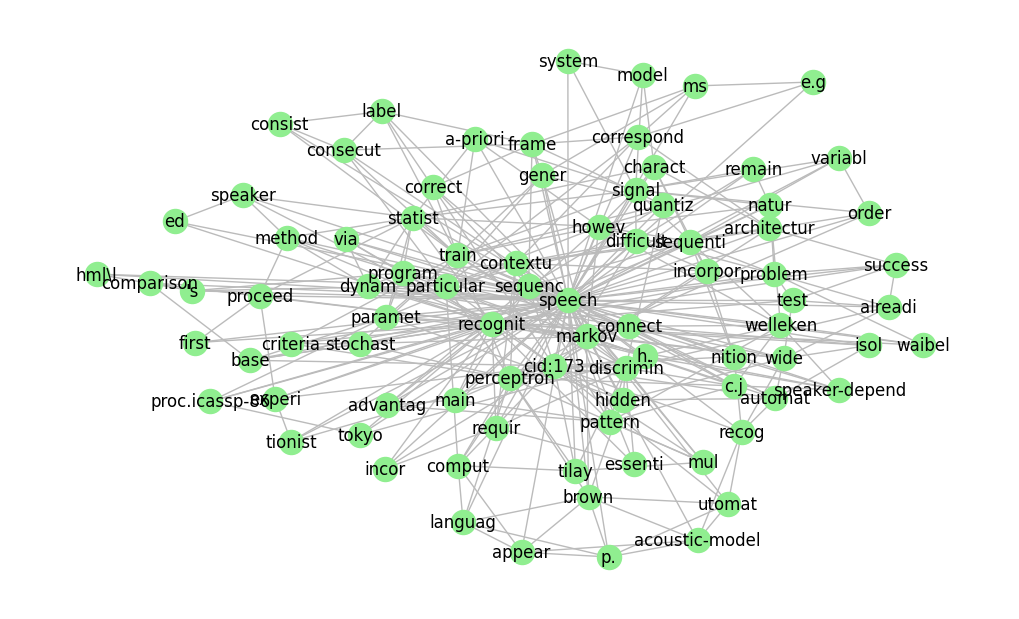

Visualizing subgraph for 'vision' from row 540


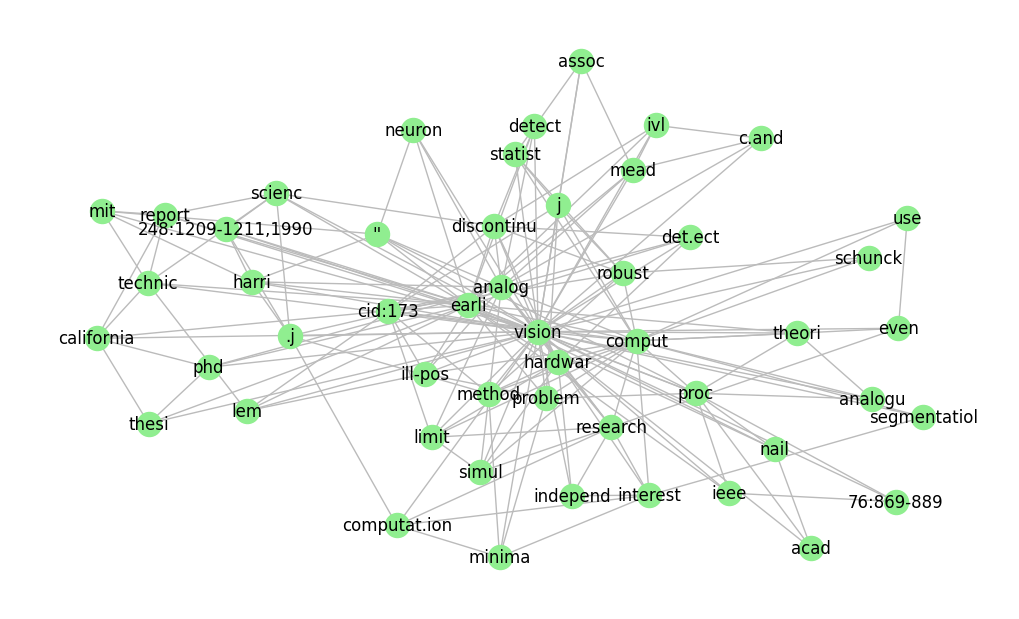

In [21]:
def visualize_keyword_subgraph(graph, keywords):
    # Find nodes and neighbors
    subgraph_nodes = set(keywords)
    for keyword in keywords:
        subgraph_nodes.update(graph.neighbors(keyword))

    subgraph = graph.subgraph(subgraph_nodes)
    
    # Draw the subgraph
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color='lightgreen', edge_color='#BBBBBB', node_size=300)
    plt.show()

# # Example usage: visualize subgraph for specific keywords
# keywords = ['speech', 'vision']
# visualize_keyword_subgraph(graph, keywords)

seen_keywords = set()  # Track already visualized keywords

for index, row in nips_papers.iterrows():  
    for keyword in row['text_rank_keywords']:
        if keyword in ['speech', 'vision'] and keyword not in seen_keywords:  
            print(f"Visualizing subgraph for '{keyword}' from row {index}")
            visualize_keyword_subgraph(row['graph'], [keyword])  # Visualize with only this keyword
            seen_keywords.add(keyword)  # Mark this keyword as visualized

    if len(seen_keywords) == len(['speech', 'vision']):  
        break  # Stop once we've visualized one graph per keyword

In [22]:
import pke
print(dir(pke.unsupervised))

['FirstPhrases', 'KPMiner', 'MultipartiteRank', 'PositionRank', 'SingleRank', 'TextRank', 'TfIdf', 'TopicRank', 'TopicalPageRank', 'YAKE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'graph_based', 'statistical']


In [23]:
# Initialize RAKE extractor
from rake_nltk import Rake

rake = Rake()

# Sample text
text = "Compatibility of systems of linear constraints over the set of natural numbers. " \
       "Criteria of compatibility of a system of linear Diophantine equations, strict " \
       "inequations, and nonstrict inequations are considered."

# Load the text into the extractor
rake.extract_keywords_from_text(text)

# Get the 5 highest scored keyword phrases
keywords = rake.get_ranked_phrases()[:5]  # Extract only top 5

# Print extracted keywords
print(keywords)

['linear diophantine equations', 'linear constraints', 'strict inequations', 'nonstrict inequations', 'natural numbers']


In [24]:
import pke

# Initialize YAKE extractor
extractor = pke.unsupervised.YAKE()

# Sample text
text = "Natural language processing enables computers to understand human language. This technology powers many applications like speech recognition, machine translation, and sentiment analysis."

# Load the text into the extractor
extractor.load_document(input=text, language='en')

# Candidate selection with no specific n-gram size, using default parameters
extractor.candidate_selection()

# Candidate weighting using YAKE's default parameters
extractor.candidate_weighting()

# Get the 5 highest scored candidates
keywords = extractor.get_n_best(n=5)

# Print extracted keywords
print(keywords)

[('natural language processing', np.float64(0.014058642058027435)), ('processing enables computers', np.float64(0.01740820038582735)), ('understand human language', np.float64(0.023313542368097673)), ('language processing enables', np.float64(0.023313542368097677)), ('natural language', np.float64(0.0517529600566101))]


In [25]:
# # Function to build the word graph for TextRank
# def build_graph(words, window_size=4):
#     G = nx.Graph()
#     for index, word in enumerate(words):
#         for i in range(index + 1, index + window_size):
#             if i >= len(words):
#                 break
#             node1, node2 = word, words[i]
#             if node1 != node2:
#                 if G.has_edge(node1, node2):
#                     G[node1][node2]['weight'] += 1
#                 else:
#                     G.add_edge(node1, node2, weight=1)
#     return G

# # Function to extract keywords using PageRank (TextRank)
# def extract_text_rank_keywords(tokens, top_n=5):
#     graph = build_graph(tokens)  # Build the graph
#     ranks = nx.pagerank(graph, weight='weight')  # Compute PageRank scores
#     sorted_ranks = sorted(ranks.items(), key=lambda x: x[1], reverse=True)  # Sort by importance
#     return [word for word, rank in sorted_ranks[:top_n]]  # Return top keywords

# # Function to compute TF-IDF
# def compute_tf_idf(tokenized_docs, top_n=5):
#     def compute_tf(tokenized_docs):
#         tf_dicts = []
#         for doc in tokenized_docs:
#             tf_dict = {}
#             total_terms = max(len(doc), 1)  # Prevent division by zero
#             for term in doc:
#                 tf_dict[term] = tf_dict.get(term, 0) + 1 / total_terms
#             tf_dicts.append(tf_dict)
#         return tf_dicts

#     def compute_df(tokenized_docs):
#         df_dict = {}
#         for doc in tokenized_docs:
#             for term in set(doc):
#                 df_dict[term] = df_dict.get(term, 0) + 1
#         return df_dict

#     def compute_idf(df_dict, total_docs):
#         idf_dict = {}
#         for term, count in df_dict.items():
#             idf_dict[term] = math.log(total_docs / count)
#         return idf_dict

#     def compute_tf_idf(tf_dicts, idf_dict):
#         tf_idf_dicts = []
#         for tf_dict in tf_dicts:
#             tf_idf_dict = {term: tf * idf_dict.get(term, 0) for term, tf in tf_dict.items()}
#             tf_idf_dicts.append(tf_idf_dict)
#         return tf_idf_dicts

#     def select_top_keywords(tf_idf_dicts, top_n):
#         top_keywords = []
#         for tf_idf_dict in tf_idf_dicts:
#             sorted_terms = sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True)
#             top_keywords.append([term for term, score in sorted_terms[:top_n]])
#         return top_keywords

#     tf_dicts = compute_tf(tokenized_docs)
#     df_dict = compute_df(tokenized_docs)
#     idf_dict = compute_idf(df_dict, len(tokenized_docs))
#     tf_idf_dicts = compute_tf_idf(tf_dicts, idf_dict)
    
#     return select_top_keywords(tf_idf_dicts, top_n)

# # Apply keyword extraction to dataset
# nips_papers['text_rank_keywords'] = nips_papers['abstract'].apply(lambda x: extract_keywords(x, method="textrank"))

In [26]:
import pandas as pd
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer

# Sample data
data = {
    'full_text': [
        "Natural language processing enables computers to understand human language. This technology powers many applications like speech recognition, machine translation, and sentiment analysis.",
        "Machine learning provides systems the ability to automatically learn and improve from experience without being explicitly programmed. It's widely used in data analysis and complex algorithms."
    ]
}
df = pd.DataFrame(data)

# Load a model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Initialize KeyBERT with the loaded model
kw_model = KeyBERT(model=model)

# Function to extract keywords
def extract_keywords(text, method="keybert"):
    if method == "keybert":
        return kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', use_maxsum=True, nr_candidates=20, top_n=5)
    elif method == "tfidf":
        tokenized_docs = text.split()  # Simple tokenization, replace with NLP tokenizer for better results
        return compute_tf_idf([tokenized_docs], top_n=5)[0]
    elif method == "textrank":
        # Implement TextRank keyword extraction here
        pass
    elif method == "yake":
        # Implement YAKE keyword extraction here
        pass
    else:
        raise ValueError("Invalid method specified. Choose from 'keybert', 'tfidf', 'textrank', or 'yake'.")

# Apply the function to the 'full_text' column
df['keywords'] = df['full_text'].apply(lambda x: extract_keywords(x))

# Display the DataFrame with keywords
print(df[['full_text', 'keywords']])

c:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



                                           full_text  \
0  Natural language processing enables computers ...   
1  Machine learning provides systems the ability ...   

                                            keywords  
0  [(like speech, 0.3116), (powers applications, ...  
1  [(automatically, 0.2877), (programmed widely, ...  


In [27]:
# first_abstract = nips_papers.iloc[0]['abstract']
# print("TF-IDF Keywords:", extract_keywords(first_abstract, 'tfidf'))
# print("TextRank Keywords:", extract_keywords(first_abstract, 'textrank'))
# print("YAKE Keywords:", extract_keywords(first_abstract, 'yake'))